<a href="https://colab.research.google.com/github/Alexxakiode/Feed-Forward-Neural-Network-Multilayer-Perceptron---classifying-images-on-FashionMNIST-Dataset/blob/main/FashionMNIST_Dataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Assessment 1 using FashionMNIST Dataset

# Library imports

In [ ]:
# Import the pandas library for data exploration
import pandas as pd
import numpy as np
from google.colab import files

import cv2
import tensorflow as tf
import keras
import seaborn as sns
import os


from tensorflow import keras
from IPython.display import display
from tensorflow.keras import utils
from keras import layers
from keras import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

# plot the history of the training
import matplotlib.pyplot as plt

# split the data into train and test
from sklearn.model_selection import train_test_split

# Normalizer library 
from sklearn.preprocessing import normalize

# Other libraries
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

RANDOM_SEED=100
seed =RANDOM_SEED


# FashionMNIST Dataset loading

In [ ]:
# Import fashion_mnist module
#from keras import fashion_mnist
from keras.datasets import fashion_mnist

# Defining the data

Note that FashionMNIST dataset has been splitted already

In [ ]:
#Fashion-MNIST Dataset 
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# Normalizing the data

In [ ]:
# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# Encoding the output dataset

In [ ]:
# One hot encode the output data
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

# Data visualisation

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize = (20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()


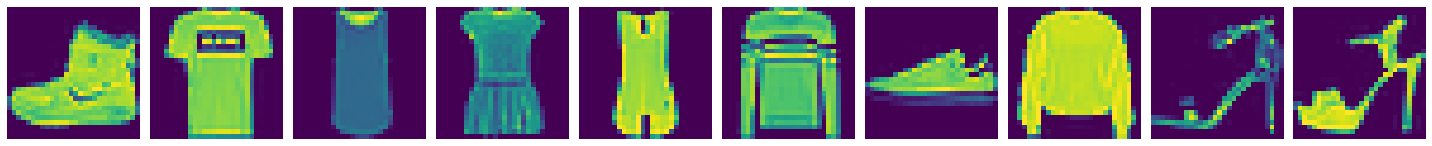

In [ ]:
plotImages(x_train [:10])

In [ ]:
#Viewing the data array
data = fashion_mnist.load_data()
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

# Create, compile and fit model with original FashionMNIST data only

# Model 4

LR = 0.00001

Ridge Regularizer L2 at 0.001

Optimizer: Adam

Activation: Relu, Relu, Softmax

Additional hidden layers: 512, 256, 128

Batch_size 100

Epochs: 200

In [ ]:
#Initialising the layers

model4 = keras.Sequential()
model4.add(keras.layers.Flatten(input_shape=(28, 28)))
model4.add(Dense(units=512, activation='relu', kernel_regularizer=regularizers.L2(0.001)))
model4.add(Dense(units=256, activation='relu', kernel_regularizer=regularizers.L2(0.001)))
model4.add(Dense(units=128, activation='relu', kernel_regularizer=regularizers.L2(0.001)))
model4.add(Dense(units=10, activation='softmax'))


# # create an optimiser object and set the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00001)

# # Compile the model with the optimiser object
model4.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit the model 
history = model4.fit(
    x_train,    # input training data
    y_train_cat,    # output training data
    batch_size=100,   # mini-batch gradient descent size
    epochs=200,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(x_test, y_test_cat))  # input test data, output test data
    

Epoch 1/200
600/600 [==============================] - 35s 52ms/step - loss: 2.5351 - accuracy: 0.5900 - val_loss: 1.9868 - val_accuracy: 0.7219
Epoch 2/200
600/600 [==============================] - 16s 27ms/step - loss: 1.8127 - accuracy: 0.7662 - val_loss: 1.7189 - val_accuracy: 0.7806
Epoch 3/200
600/600 [==============================] - 10s 16ms/step - loss: 1.6317 - accuracy: 0.8034 - val_loss: 1.5965 - val_accuracy: 0.8056
Epoch 4/200
600/600 [==============================] - 9s 14ms/step - loss: 1.5321 - accuracy: 0.8216 - val_loss: 1.5177 - val_accuracy: 0.8190
Epoch 5/200
600/600 [==============================] - 9s 16ms/step - loss: 1.4619 - accuracy: 0.8311 - val_loss: 1.4578 - val_accuracy: 0.8255
Epoch 6/200
600/600 [==============================] - 11s 18ms/step - loss: 1.4073 - accuracy: 0.8382 - val_loss: 1.4119 - val_accuracy: 0.8290
Epoch 7/200
600/600 [==============================] - 10s 16ms/step - loss: 1.3620 - accuracy: 0.8427 - val_loss: 1.3698 - val_accu

In [ ]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


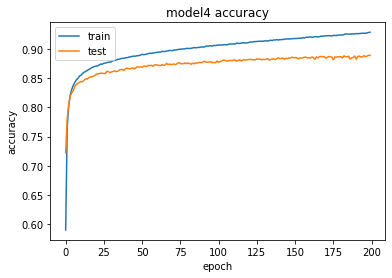

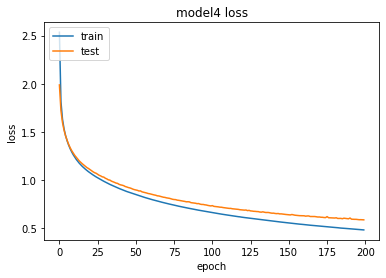

In [ ]:
# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model4 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#Evaluation

In [ ]:
evaluation = model4.evaluate(x_test, y_test_cat)
print('[test loss, test accuracy]:', evaluation)

313/313 [==============================] - 1s 4ms/step - loss: 0.5830 - accuracy: 0.8893
[test loss, test accuracy]: [0.5830386877059937, 0.8892999887466431]


#Predictions

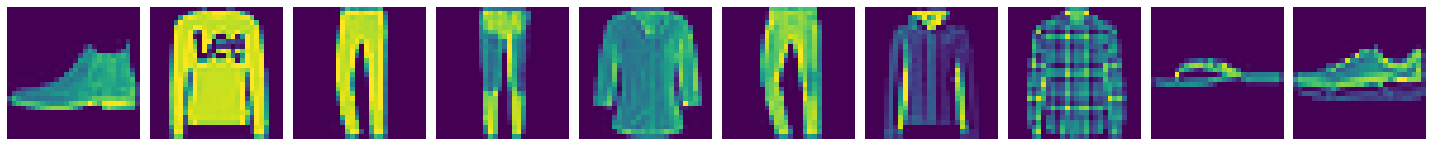

In [ ]:
plotImages(x_test[:10])

In [ ]:
predictions=np.argmax(model4.predict(x_test[:10]),axis=-1)
y_pred2 = predictions
print(y_pred2)

1/1 [==============================] - 0s 157ms/step
[9 2 1 1 6 1 4 6 5 7]


In [ ]:
# predictions=np.argmax(model4.predict(x_test),axis=-1)
# y_pred2 = predictions
# print(y_pred2)

## Scoring

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test, y_pred2)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.77212971 0.98170732 0.88546256 0.83302583 0.67382962 0.96855984
 0.74069149 0.9447341  0.92761905 0.91792453]
recall: [0.881 0.966 0.603 0.903 0.878 0.955 0.557 0.906 0.974 0.973]
fscore: [0.82297992 0.97379032 0.7174301  0.86660269 0.76248372 0.96173212
 0.63584475 0.92496172 0.9502439  0.94466019]
